# Predictive Analytics for E-commerce Sales

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Load Dataset

In [5]:
df = pd.read_csv("Ecommerce_Sales_Prediction_Dataset.csv") 
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1000, 7)


,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


### Data Understanding

In [19]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              396 non-null    datetime64[ns]
 1   Product_Category  1000 non-null   object        
 2   Price             1000 non-null   float64       
 3   Discount          1000 non-null   float64       
 4   Customer_Segment  1000 non-null   object        
 5   Marketing_Spend   1000 non-null   float64       
 6   Units_Sold        1000 non-null   int64         
 7   Year              396 non-null    float64       
 8   Month             396 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 70.4+ KB
None
                                Date        Price     Discount  \
count                            396  1000.000000  1000.000000   
mean   2024-05-18 23:38:10.909090816   505.241920    24.919750   
min             

### Data Preprocessing

In [ ]:

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where Date could not be parsed
df = df.dropna(subset=['Date'])

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
Year                0
Month               0
dtype: int64


### Encode Categorical Variables

In [21]:
df_encoded = pd.get_dummies(df[['Product_Category', 'Customer_Segment']], drop_first=True)
print(df_encoded.head())

   Product_Category_Fashion  Product_Category_Home Decor  \
0                     False                        False   
1                     False                        False   
2                     False                         True   
3                     False                        False   
4                     False                        False   

   Product_Category_Sports  Product_Category_Toys  Customer_Segment_Premium  \
0                     True                  False                     False   
1                    False                   True                      True   
2                    False                  False                      True   
3                    False                   True                      True   
4                    False                   True                      True   

   Customer_Segment_Regular  
0                     False  
1                     False  
2                     False  
3                     False  
4             

### Create Feature Set and Target Variable

In [33]:
# Select features and target
features = df[['Price', 'Discount', 'Marketing_Spend', 'Year', 'Month']]
target = df['Units_Sold']

# Handle any remaining missing values in features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

### Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 11) (200, 11) (800,) (200,)


### Model Training

In [35]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(y_pred_rf)



[28.82430619 29.37472266 29.1144488  29.57530171 29.18136299 29.13429965
 29.36595539 29.15220118 28.87390631 29.26654569 29.07571291 29.05466931
 28.6953738  29.01760093 28.88233066 28.92588662 29.74601005 28.70724973
 28.95539649 28.45331219 29.05121844 29.14654316 28.83753174 29.81134648
 28.82158047 29.55188152 28.76832702 28.73388131 29.31686728 29.62720367
 29.58688416 28.64892827 29.04231989 29.2310174  29.34333872 28.84088392
 28.69750324 28.88406557 29.24116534 28.80251002 29.1575886  29.61711139
 29.14259813 28.93410661 29.07158637 29.14300925 28.69493065 29.28541943
 29.31563861 28.81736774 29.1992058  28.99705497 28.93670095 28.95617736
 29.47589425 29.54726923 29.45581381 29.12253116 29.21206817 29.25220124
 29.3201272  29.54173778 28.94506143 29.37161448 28.91731862 29.03958419
 28.70038141 29.31479568 29.39649834 28.94666496 28.97479723 29.20113461
 29.316953   28.97567204 29.05580684 29.00367127 28.88321244 30.04060838
 28.68060241 29.35141411]
[27.13 30.27 30.27 28.46 

### Model Evaluation

In [36]:
# Linear Regression
print("\nLinear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Random Forest
print("\nRandom Forest:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression:
R² Score: -0.006406841505028016
RMSE: 7.22667349281332

Random Forest:
R² Score: -0.05514934464682031
RMSE: 7.3996062395238305


### Visualization - Actual vs Predicted (Random Forest)

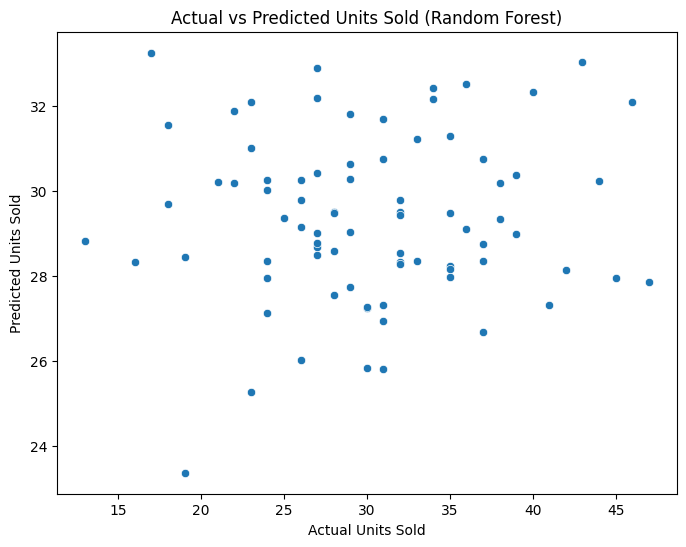

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Units Sold (Random Forest)")
plt.show()